In [1]:
#@title Importing libraries (double-click to show code)
import os
import pkg_resources
pkg_resources.require("numpy>=`1.20.1")  #  to use specific numpy version
import numpy as np
import rsnapsim as rss
import sys
from sys import platform
from skimage import io ; from skimage.io import imread; from skimage.measure import find_contours
from random import randrange
import pandas as pd
import os; from os import listdir; from os.path import isfile, join
import re
import shutil
import pathlib
from random import randrange
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout 
from IPython.display import Image
import dna_features_viewer
from dna_features_viewer import BiopythonTranslator, GraphicFeature, GraphicRecord, CircularGraphicRecord

# Deffining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases','videos_for_sim_cell')
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')

# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.grid'] = False


In [2]:
# Plasmid sequences
gene_file_pUB_SM_KDM5B_PP7 = str(sequences_dir.joinpath('pUB_SM_KDM5B_PP7.gb')) # plasmid pUB_SM_KDM5B_PP7 
gene_file_pUB_SM_p300_MS2 = str(sequences_dir.joinpath('pUB_SM_p300_MS2.gb')) # plasmid pUB_SM_p300_MS2

# Coding sequence
gene_file_KDM5B_PP7 = str(sequences_dir.joinpath('pUB_SM_KDM5B_PP7_coding_sequence.txt')) # coding sequence for SM_KDM5B_PP7
gene_file_p300_MS2 = str(sequences_dir.joinpath('pUB_SM_p300_MS2_coding_sequence.txt'))  # coding sequence for SM_p300_MS2

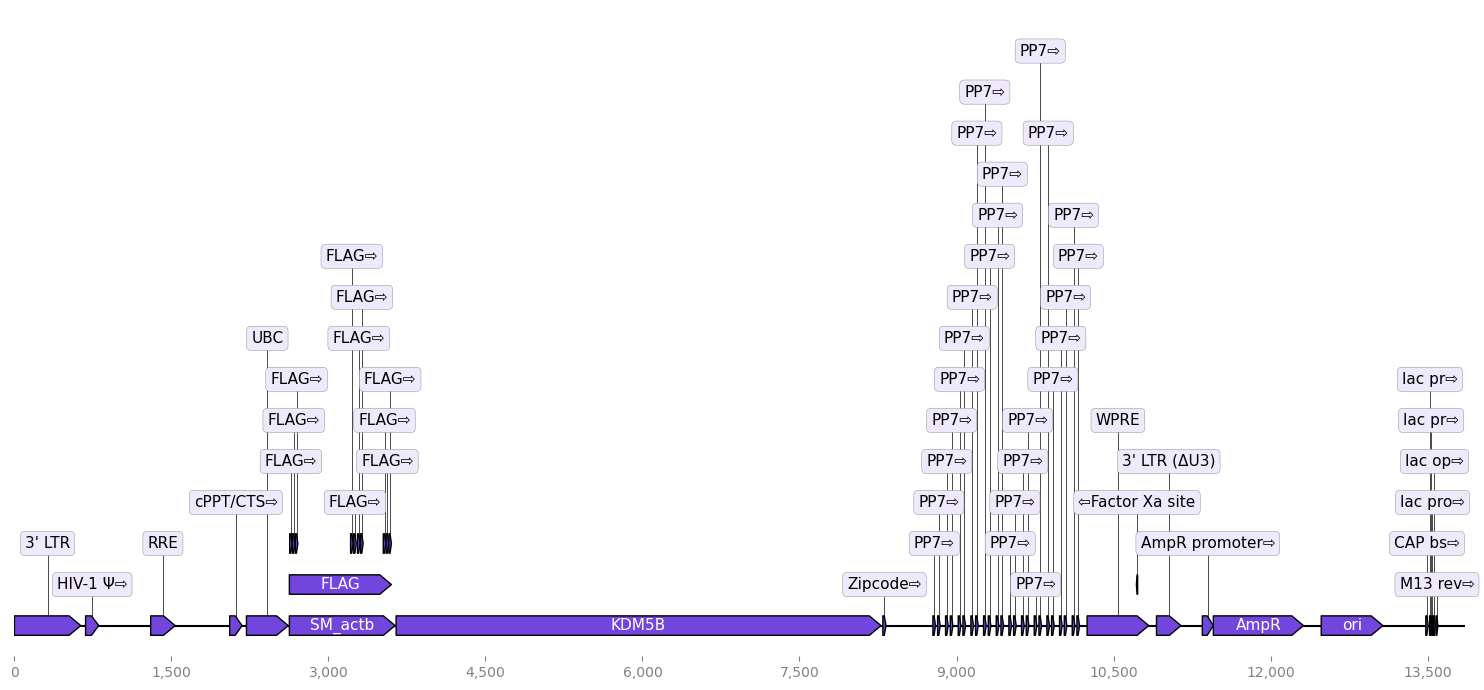

In [3]:
plt.style.use('default')
graphic_record = BiopythonTranslator().translate_record(gene_file_pUB_SM_KDM5B_PP7) #, record_class=CircularGraphicRecord
ax, _ = graphic_record.plot(figure_width=15, strand_in_label_threshold=15 )
ax.figure.tight_layout()
#ax.figure.savefig("from_genbank.png")


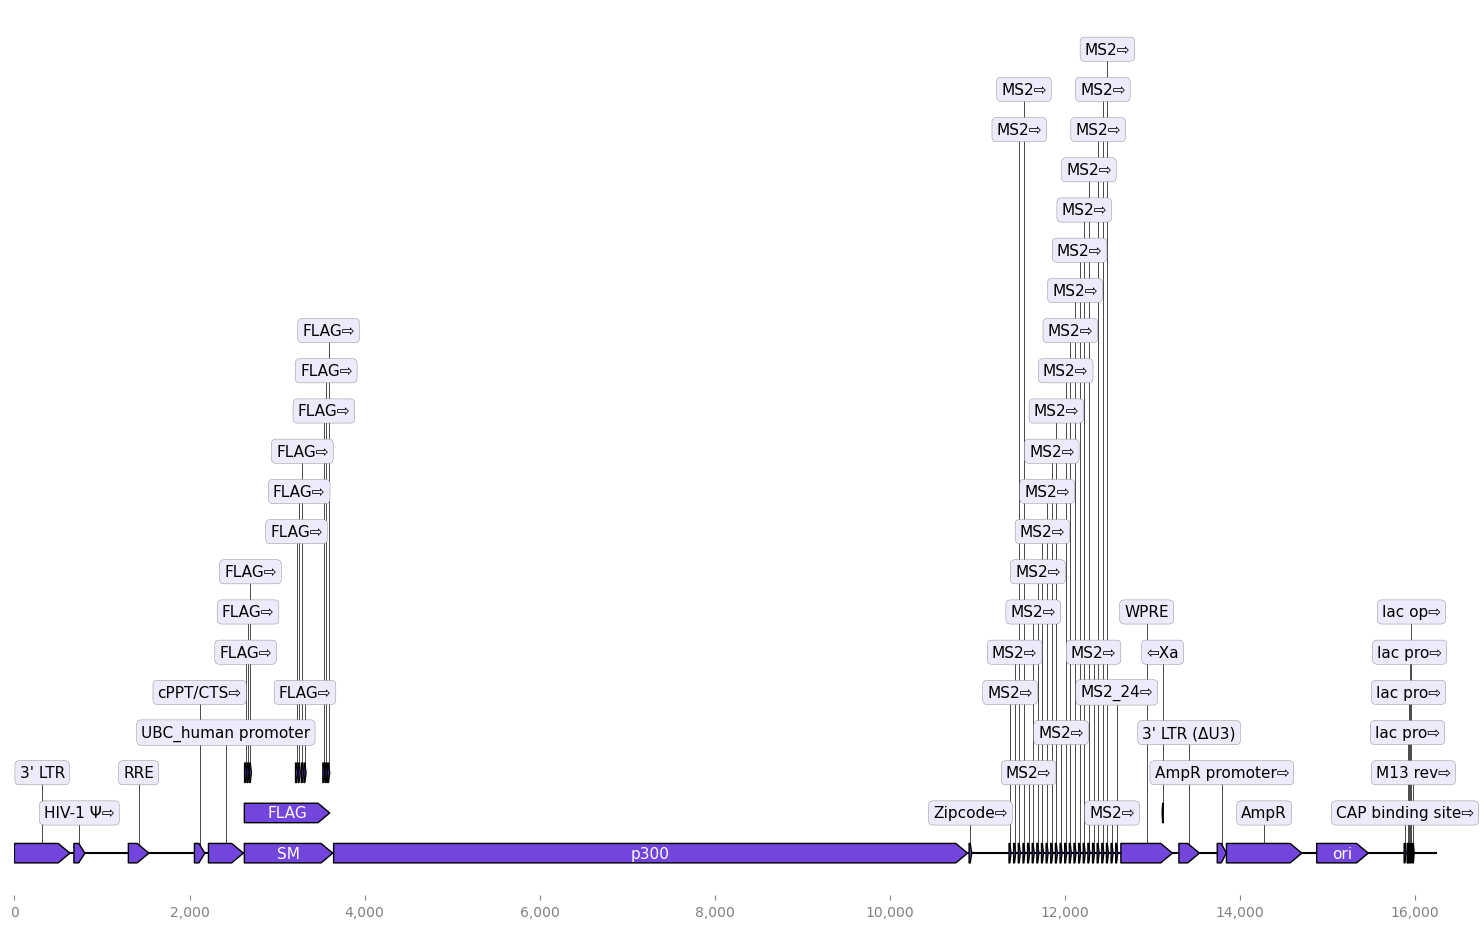

In [4]:
graphic_record = BiopythonTranslator().translate_record(gene_file_pUB_SM_p300_MS2) #, record_class=CircularGraphicRecord
ax, _ = graphic_record.plot(figure_width=15, strand_in_label_threshold=10)
ax.figure.tight_layout()
#ax.figure.savefig("from_genbank.png")

In [5]:
list_files_names = sorted([f for f in listdir(video_dir) if isfile(join(video_dir, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_dir.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
num_cell_shapes = len(path_files)

In [6]:
# proteins with Cy3 (green), PP7 with JF646 (red), and MS2 with GFP (blue).

In [7]:
# Inputs
list_gene_sequences = [gene_file_KDM5B_PP7, gene_file_p300_MS2] # path to gene sequences
list_number_spots = [25, 25] # list of integers, where each element represents the number of spots

list_target_channels_proteins = [1, 1] # channel where the simulated protein spots will be located. Integer between 0 and 2. 

list_target_channels_mRNA = [0, 2] # channel where the simulated mRNA spots will be located. Integer between 0 and 2. 

list_diffusion_coefficients =[0.5, 0.5] # diffusion coefficients for each gene
list_label_names = ['kdm5b','p300'] # list of strings used to generate a classification field in the output data frame

list_elongation_rates = [3, 3] # elongation rates aa/sec
list_initation_rates = [0.07, 0.07] # initiation rates 1/sec
frame_selection_empty_video = 'constant' # Options are: 'constant' , 'shuffle' and 'loop'

simulation_time_in_sec = 10
step_size_in_sec = 1
save_as_tif = 1 # option to save the simulated video
save_dataframe = 1 # option to save the simulation output as a dataframe in format csv. 
create_temp_folder = 1 # saves the video and data frame in a temp folder

spot_size = 3 # size of spots

In [8]:
# Number of simulated Cell
number_cells = 5

In [9]:
list_dataframe_simulated_cell =[]
list_ssa_all_genes =[]
list_videos =[]
for i in range (0,number_cells ):
    saved_file_name = 'cell_' + str(i)  # if the video or dataframe are save, this variable assigns the name to the files
    sel_shape = randrange(num_cell_shapes)
    video_path = path_files[sel_shape]
    inial_video = io.imread(video_path) # video with empty cell
    tensor_video, single_dataframe_simulated_cell,list_ssa = rsp.SimulatedCellMultiplexing(inial_video,list_gene_sequences,list_number_spots,list_target_channels_proteins,list_target_channels_mRNA, list_diffusion_coefficients,list_label_names,list_elongation_rates,list_initation_rates,simulation_time_in_sec,step_size_in_sec,save_as_tif, save_dataframe, saved_file_name,create_temp_folder,cell_number =i,frame_selection_empty_video=frame_selection_empty_video,spot_size =spot_size).make_simulation()
    list_dataframe_simulated_cell.append(single_dataframe_simulated_cell)
    list_ssa_all_genes.append(list_ssa)
    list_videos.append(tensor_video)

The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp


In [10]:
dataframe_simulated_cell = pd.concat(list_dataframe_simulated_cell)

In [11]:
dataframe_simulated_cell

,cell_number,particle,frame,red_int_mean,green_int_mean,blue_int_mean,red_int_std,green_int_std,blue_int_std,x,y,Classification
0,0,0,0,108.800003,68.940002,1.980000,173.991954,104.131486,34.235794,367.0,285.0,kdm5b
1,0,0,1,102.160004,69.300003,1.980000,165.435348,104.567681,34.235794,367.0,285.0,kdm5b
2,0,0,2,126.320000,68.680000,0.000000,172.704538,103.238256,32.632891,368.0,285.0,kdm5b
3,0,0,3,32.200001,76.940002,5.980000,47.661305,101.209517,40.137882,368.0,286.0,kdm5b
4,0,0,4,33.139999,74.260002,2.380000,55.416156,97.019289,38.010862,370.0,286.0,kdm5b
...,...,...,...,...,...,...,...,...,...,...,...,...
245,4,49,5,13.920000,90.660004,54.580002,78.703962,113.202007,69.196485,320.0,207.0,p300
246,4,49,6,17.680000,92.639999,79.440002,80.330677,118.297888,101.944722,319.0,207.0,p300
247,4,49,7,28.700001,92.000000,72.879997,73.464005,121.854996,98.061336,319.0,208.0,p300
248,4,49,8,39.439999,90.559998,87.080002,81.912675,123.258454,118.818153,318.0,208.0,p300


In [12]:
list_videos[0].shape

(10, 512, 512, 3)

In [13]:
num_videos =len(list_videos)
num_videos

5

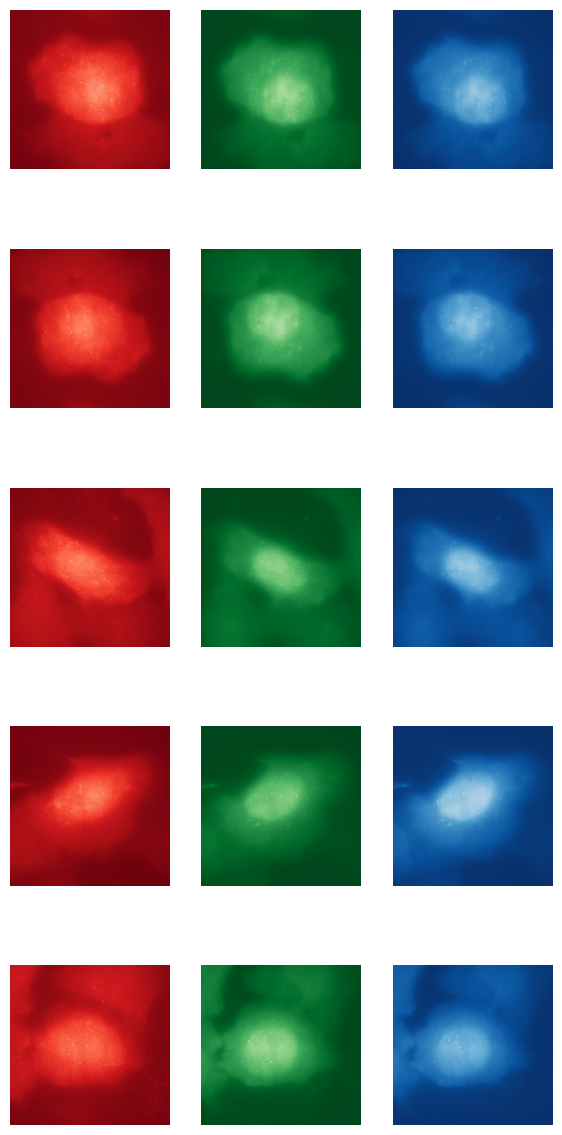

In [14]:
# In this section of the code we will plot the videos for all cells using a for loop. 
# in the plot each row represents a cell and the columns represent the color channel.
selected_timePoint = 0 # selecting a frame to display in the plot.

fig, ax = plt.subplots(num_videos,3, figsize=(7, num_videos*3))
for i in range(0,num_videos):
  ax[i,0].imshow(list_videos[i][selected_timePoint,:,:,0],cmap='Reds_r')
  ax[i,1].imshow(list_videos[i][selected_timePoint,:,:,1],cmap='Greens_r')
  ax[i,2].imshow(list_videos[i][selected_timePoint,:,:,2],cmap='Blues_r')
  ax[i,0].axis('off')
  ax[i,1].axis('off')
  ax[i,2].axis('off')
plt.show()